In [ ]:
(from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,019 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

## 런타임 재시작(한글 폰트 깨짐 방지)

In [ ]:
%cd /content/drive/MyDrive/공모전 코드제출

/content/drive/MyDrive/공모전 코드제출


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install graphviz
!pip install shap

     |████████████████████████████████| 356 kB 5.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491667 sha256=a91086cc610b4283fc2e18092a2e35ee6e34e1618c3040e63e381874fddc355a
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


# 1. 데이터전처리

###**1.1. 엑셀을 통한 전처리**
1. 온라인 쇼핑 품목 데이터(BC카드)와 서울시 금융자산 데이터(신한은행)를 병합하기 위해 공통의 피쳐를 생성 

2. 공통의 피쳐: 기준년월, 성별, 연령, 법정동

3. 온라인 쇼핑품목 데이터는 공통의 피쳐를 기준으로 각각의 품목(품목중분류명)의 매출건수, 매출총액을 합계함 

4. 서울시 금융자산 데이터는 별다른 변형 과정 없이 병합함

5. 병합 과정에서는 ‘inner join’방법을 사용, 데이터가 중복 여부 확인

### **1.2. 데이터를 1인당 값으로 전처리**

1. 행정안전부 주민등록 인구 통계 데이터, '202012_연령별인구현황_연간'를 아용하여 인구수 데이터 생성

2. 병합된 1.1 데이터에 인구수 데이터를 성별, 연령, 법정동 기준으로 조인

3. 온라인 쇼핑 품목 데이터를 인구수로 나눔, 1인당 온라인 구매품목 매출건수/매출금액 값 도출 

  ex) 온라인 쇼핑 품목 데이터 : 디지털매출건수 / 도곡동 30대 남자의 인구수 
4. 서울시 금융자산 데이터(신한은행)는 1인당 평균금액으로 수집된 값이므로 병합과정에서 한 그룹에 몇개의 객체가 합쳐졌는지를 의미하는 피처 n으로 나누어 1인값 도출 

  ex) 도곡동 30대 남자의 총수신금액의 합 / n 



## 1.2 데이터를 1인당 값으로 전처리

### 1.2.1 인구수 데이터 전처리

In [ ]:
refined_data= pd.read_csv("data/refined_data.csv").drop(columns='Unnamed: 0')
refined_data

,기준년월,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n
0,1,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,...,0,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0,345
1,1,가락동,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,...,0,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0,411
2,1,가락동,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,...,0,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0,369
3,1,가락동,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,...,0,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0,363
4,1,가락동,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,5,흥인동,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,7565973,21540136,1.691960e+07,0.0,0,0.0,0.000000e+00,0,0.0,4
14468,5,흥인동,0,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,266084,0,0,0,0,...,334677,0,0,12,1026043.0,0,0,0,0,0,0,0,0,0,0,0,0,7,289857.0,0,0,0,0,5,432260,0,0,0,0,0.0,8887386,14462496,1.505395e+07,0.0,0,0.0,0.000000e+00,0,0.0,4
14469,5,흥인동,0,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1278523,0,0,0,0,...,0,0,0,0,0.0,9,821315,9,329255,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6467308,0,0.0,15377193,63203897,4.582949e+07,0.0,0,0.0,0.000000e+00,0,0.0,6
14470,5,흥인동,0,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,564135,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,9113575,29198407,1.760240e+07,4008189.0,1058035,17024229.0,1.328604e+08,0,0.0,4


In [ ]:
#3개 데이터 모두 서울 뿐만 아니라 전국에 대한 수집 값
df1=pd.read_excel("data/법정동to행정동치환 자료.xlsx")
df2=pd.read_csv("data/인구수비중남자.csv", encoding="cp949")
df3=pd.read_csv('data/인구수비중여자.csv', encoding="cp949")

In [ ]:
df1=df1[['행정동코드', '법정동코드', '법정동']]

In [ ]:
df1

,행정동코드,법정동코드,법정동
0,11000000,11000000.0,서울특별시
1,11110000,11110000.0,종로구
2,11110515,11110101.0,청운동
3,11110515,11110102.0,신교동
4,11110515,11110103.0,궁정동
...,...,...,...
21734,50130610,50130114.0,대포동
21735,50130610,50130118.0,하원동
21736,50130620,50130119.0,색달동
21737,50130620,50130120.0,상예동


In [ ]:
df2.head()

,행정동코드,성별,연령,인구수
0,11000000,1,20,707669
1,11000000,1,30,737901
2,11000000,1,40,756950
3,11000000,1,50,748582
4,11000000,1,60,1016049


In [ ]:
df3

,행정동코드,성별,연령,인구수
0,11000000,0,20,752742
1,11000000,0,30,737205
2,11000000,0,40,771232
3,11000000,0,50,774974
4,11000000,0,60,1210075
...,...,...,...,...
19230,50130620,0,20,239
19231,50130620,0,30,194
19232,50130620,0,40,246
19233,50130620,0,50,306


In [ ]:
join_popboy= pd.merge(left=df2, right=df1, how='left', on='행정동코드',left_index=True)
join_popboy

,행정동코드,성별,연령,인구수,법정동코드,법정동
0.0,11000000,1,20,707669,11000000.0,서울특별시
0.0,11000000,1,30,737901,11000000.0,서울특별시
0.0,11000000,1,40,756950,11000000.0,서울특별시
0.0,11000000,1,50,748582,11000000.0,서울특별시
0.0,11000000,1,60,1016049,11000000.0,서울특별시
...,...,...,...,...,...,...
21737.0,50130620,1,50,383,50130120.0,상예동
21738.0,50130620,1,50,383,50130121.0,하예동
21736.0,50130620,1,60,575,50130119.0,색달동
21737.0,50130620,1,60,575,50130120.0,상예동


행정동이랑 법정동조인할 떄 인구수가 중복되는 것을 제거 해보겠다.(남자데이터로 먼저하고 여자데이터는 중간 과정은 생략)

In [ ]:
### 중복된 값들이 발생함. 왜냐하면 행정동이 더 세분화되 개념인데 그게 반드시 법정코드에 부분집합화 되어 있는 개념은 아니기 때문에 중복값이 발생한다.
### 그래서 이렇게 미스매치 된 값들을 다 제거해보고 진행해 하였다.
join_popboy[join_popboy.duplicated(['행정동코드',	'성별',	'연령',	'인구수'])]

,행정동코드,성별,연령,인구수,법정동코드,법정동
3.0,11110515,1,20,793,11110102.0,신교동
4.0,11110515,1,20,793,11110103.0,궁정동
5.0,11110515,1,20,793,11110104.0,효자동
6.0,11110515,1,20,793,11110105.0,창성동
7.0,11110515,1,20,793,11110108.0,통인동
...,...,...,...,...,...,...
21738.0,50130620,1,40,299,50130121.0,하예동
21737.0,50130620,1,50,383,50130120.0,상예동
21738.0,50130620,1,50,383,50130121.0,하예동
21737.0,50130620,1,60,575,50130120.0,상예동


In [ ]:
###법정동이랑 행정동을 조인할 때 중복된 값들을 다 제거해준 값들이다.
join_popboy_clear=join_popboy.drop_duplicates(subset=['행정동코드',	'성별',	'연령',	'인구수'])
join_popboy_clear

,행정동코드,성별,연령,인구수,법정동코드,법정동
0.0,11000000,1,20,707669,11000000.0,서울특별시
0.0,11000000,1,30,737901,11000000.0,서울특별시
0.0,11000000,1,40,756950,11000000.0,서울특별시
0.0,11000000,1,50,748582,11000000.0,서울특별시
0.0,11000000,1,60,1016049,11000000.0,서울특별시
...,...,...,...,...,...,...
21736.0,50130620,1,20,252,50130119.0,색달동
21736.0,50130620,1,30,249,50130119.0,색달동
21736.0,50130620,1,40,299,50130119.0,색달동
21736.0,50130620,1,50,383,50130119.0,색달동


In [ ]:
###중복값 제거가 잘되었는지 확인>>> 잘되었음을 확인
join_popboy_clear[join_popboy_clear.duplicated(['행정동코드',	'성별',	'연령',	'인구수'])]

,행정동코드,성별,연령,인구수,법정동코드,법정동


In [ ]:
##남자 인구 통계 데이터 프레임
join_popboy_clear=join_popboy_clear[['법정동코드','법정동','성별','연령','인구수']]
join_popboy_clear

,법정동코드,법정동,성별,연령,인구수
0.0,11000000.0,서울특별시,1,20,707669
0.0,11000000.0,서울특별시,1,30,737901
0.0,11000000.0,서울특별시,1,40,756950
0.0,11000000.0,서울특별시,1,50,748582
0.0,11000000.0,서울특별시,1,60,1016049
...,...,...,...,...,...
21736.0,50130119.0,색달동,1,20,252
21736.0,50130119.0,색달동,1,30,249
21736.0,50130119.0,색달동,1,40,299
21736.0,50130119.0,색달동,1,50,383


In [ ]:
##여자 인구 통계 데이터 프레임
join_popgirl= pd.merge(left=df3, right=df1, how='left', on='행정동코드',left_index=True)
join_popgirl_clear=join_popgirl.drop_duplicates(subset=['행정동코드',	'성별',	'연령',	'인구수'])
join_popgirl_clear=join_popgirl_clear[['법정동코드','법정동','성별','연령','인구수']]
join_popgirl_clear

,법정동코드,법정동,성별,연령,인구수
0.0,11000000.0,서울특별시,0,20,752742
0.0,11000000.0,서울특별시,0,30,737205
0.0,11000000.0,서울특별시,0,40,771232
0.0,11000000.0,서울특별시,0,50,774974
0.0,11000000.0,서울특별시,0,60,1210075
...,...,...,...,...,...
21736.0,50130119.0,색달동,0,20,239
21736.0,50130119.0,색달동,0,30,194
21736.0,50130119.0,색달동,0,40,246
21736.0,50130119.0,색달동,0,50,306


In [ ]:
##남자,여자 인구수 데이터 하나로 합치기
merge_popul=pd.concat([join_popboy_clear,join_popgirl_clear])
merge_popul

,법정동코드,법정동,성별,연령,인구수
0.0,11000000.0,서울특별시,1,20,707669
0.0,11000000.0,서울특별시,1,30,737901
0.0,11000000.0,서울특별시,1,40,756950
0.0,11000000.0,서울특별시,1,50,748582
0.0,11000000.0,서울특별시,1,60,1016049
...,...,...,...,...,...
21736.0,50130119.0,색달동,0,20,239
21736.0,50130119.0,색달동,0,30,194
21736.0,50130119.0,색달동,0,40,246
21736.0,50130119.0,색달동,0,50,306


### 1.2.2 온라인 쇼핑 품목 데이터(BC카드)와 서울시 금융자산 데이터(신한은행)를 1인당 값으로 변환

'refined_data에는 법정동이 없기 때문에 법정동코드를 이 데이터에 붙여주기 위하여 df와 df1을 병렬로 합친다음에 읍면동이랑 법정동코드를 같이 추출.

In [ ]:
df=pd.read_excel('data/머신러닝을 위한 학습자료(월을 기준으로 합쳐서 숫자화).xlsx')
df1=pd.read_csv('data/BC card.csv')
df

,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,시군구,법정동코드,매출금액,매출건수,예금금액,소비금액,주택대출금액,전세자금대출,인구밀도
0,201903,10,1010,0,40.0,3,구로구,11530109.0,782521,13,NaN,NaN,NaN,NaN,NaN
1,201903,21,2110,0,20.0,2,구로구,11530109.0,963789,29,NaN,NaN,NaN,NaN,NaN
2,201903,19,1913,0,30.0,2,구로구,11530109.0,924309,46,NaN,NaN,NaN,NaN,NaN
3,201903,21,2111,0,30.0,2,구로구,11530109.0,1089360,54,NaN,NaN,NaN,NaN,NaN
4,201903,17,1710,0,30.0,2,구로구,11530109.0,1656740,58,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,202103,20,2013,0,30.0,1,영등포구,11560108.0,1411368,7,NaN,NaN,NaN,NaN,NaN
306118,202103,21,2110,1,30.0,1,영등포구,11560108.0,1386040,63,NaN,NaN,NaN,NaN,NaN
306119,202103,11,1113,0,30.0,2,영등포구,11560108.0,390818,7,NaN,NaN,NaN,NaN,NaN
306120,202103,16,1610,1,40.0,3,영등포구,11560108.0,327592,7,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1['법정동코드']=df['법정동코드']
df2=df1[['읍면동','법정동코드']]

In [ ]:
df2[df2.duplicated(['읍면동','법정동코드'])]

,읍면동,법정동코드
1,궁동,11530109.0
2,궁동,11530109.0
3,궁동,11530109.0
4,궁동,11530109.0
6,길동,11740105.0
...,...,...
306117,영등포동7가,11560108.0
306118,영등포동7가,11560108.0
306119,영등포동7가,11560108.0
306120,영등포동7가,11560108.0


In [ ]:
df2=df2.drop_duplicates(subset=['읍면동', '법정동코드'], keep='first')

In [ ]:
df2[df2['법정동코드'].isnull()]  ## 궁정동: 11110103 도럼동:11110116 봉래동2가:11140120

,읍면동,법정동코드
75512,궁정동,NaN
135887,도렴동,NaN
260662,봉래동2가,NaN


In [ ]:
df2.loc[75512,'법정동코드']=11110103
df2.loc[135887,'법정동코드']=11110116
df2.loc[260662,'법정동코드']=111140120

In [ ]:
df2.isnull().sum()

읍면동      0
법정동코드    0
dtype: int64

여기 위에서 refined_data에 법정동코드를 붙여주기 위한 이전 작업을 하였고 지금부터는 df2 데이터가 가지고 있는 법정동코드를 refined_data에 조인을 시켜주면서 refined_data가 법정동코드를 가지게 만들 것임. 여기서 법정동이랑 읍면동은 결국 같은 것임

In [ ]:
refined_data_final=pd.merge(left=refined_data, right=df2, how='left', left_on='법정동', right_on='읍면동')
refined_data_final=refined_data_final.drop(columns='읍면동')
refined_data_final['법정동코드'].isnull().sum() ####결측치가 없음을 확인

0

In [ ]:
col1=refined_data_final.columns[1:].to_list()
col2=refined_data_final.columns[:1].to_list()
new_col = col1+col2
refined_data_final = refined_data_final[new_col]

In [ ]:
refined_data_final

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월
0,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,...,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0,345,11710107.0,1
1,가락동,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,38,...,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0,411,11710107.0,1
2,가락동,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,38,...,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0,369,11710107.0,1
3,가락동,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,0,...,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0,363,11710107.0,1
4,가락동,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0,582,11710107.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,흥인동,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,7565973,21540136,1.691960e+07,0.0,0,0.0,0.000000e+00,0,0.0,4,11140163.0,5
14468,흥인동,0,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,266084,0,0,0,0,0,...,0,12,1026043.0,0,0,0,0,0,0,0,0,0,0,0,0,7,289857.0,0,0,0,0,5,432260,0,0,0,0,0.0,8887386,14462496,1.505395e+07,0.0,0,0.0,0.000000e+00,0,0.0,4,11140163.0,5
14469,흥인동,0,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1278523,0,0,0,0,0,...,0,0,0.0,9,821315,9,329255,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6467308,0,0.0,15377193,63203897,4.582949e+07,0.0,0,0.0,0.000000e+00,0,0.0,6,11140163.0,5
14470,흥인동,0,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,564135,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,9113575,29198407,1.760240e+07,4008189.0,1058035,17024229.0,1.328604e+08,0,0.0,4,11140163.0,5


위에서 refined_data에서 법정동코드를 부여 했으니깐 이제부터는 원래 하려고 했던 법정동코드 기준으로 인구수를 이 데이터에 조인을 시킬 것임

In [ ]:
##merge_popul에서 법정동을 drop해보자
merge_popul=merge_popul.drop(columns='법정동')

In [ ]:
###중복값 제거를 위한 sum 작업
merge_popul2=merge_popul['인구수'].groupby([merge_popul['법정동코드'], merge_popul['성별'],merge_popul['연령']]).sum()
merge_popul2=pd.DataFrame(merge_popul2)
merge_popul2.to_csv("data/merge_popul2.csv")
merge_popul2=pd.read_csv("data/merge_popul2.csv")
merge_popul2

,법정동코드,성별,연령,인구수
0,11000000.0,0,20,752742
1,11000000.0,0,30,737205
2,11000000.0,0,40,771232
3,11000000.0,0,50,774974
4,11000000.0,0,60,1210075
...,...,...,...,...
30455,50130320.0,1,20,696
30456,50130320.0,1,30,543
30457,50130320.0,1,40,1114
30458,50130320.0,1,50,1275


In [ ]:
merge_popul=merge_popul2

정제된 데이터로 조인 실시 >>>행정동 법정동 코드를 조인하면 14472개의 행이 9017로 줄어듦

In [ ]:
###left로 조인해서 몇개의 데이터의 손실이 있지만 괜찮다고 생각
refined_Join=pd.merge(left=refined_data_final, right=merge_popul, how='inner', on=['법정동코드','성별','연령'])
refined_Join

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월,인구수
0,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,...,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.0,0,0.0,345,11710107.0,1,6114
1,가락동,1,20,0,0,148,3465320.0,735,24542751,14,253987,7,321960,9,394550,17,709821,0,0.0,0,0,16,167389,0,0,0,0,5,343532,22,1418810,0,0,69,7906034,0,0,0,0,5,...,133,7042276.0,7,220268,10,202642,0,0,5,169784,0,0,181,7835122,7,461092.0,0,0,0,0,12,586263,0,0,0,0,0.0,295865250,670979184,1.053546e+09,0.0,0,0.0,0.0,0,0.0,348,11710107.0,2,6114
2,가락동,1,20,4,117000,166,5821534.0,826,23837931,22,426765,4,192886,8,1548210,19,653814,0,0.0,0,0,16,250860,13,15000,0,0,0,0,26,1621602,0,0,71,9230347,0,0,0,0,25,...,65,2338346.0,7,178429,18,294783,0,0,9,363280,5,292214,161,6654031,13,508770.0,0,0,0,0,15,410897,0,0,7802475,0,0.0,250249365,787022433,1.008720e+09,0.0,0,0.0,0.0,0,0.0,363,11710107.0,3,6114
3,가락동,1,20,0,0,188,2131163.0,621,19129142,10,186705,0,0,0,0,0,0,0,0.0,0,0,55,200309,0,0,0,0,0,0,0,0,0,0,62,2493538,0,0,0,0,0,...,89,3425997.0,10,706423,0,0,0,0,10,132909,0,0,201,4529768,0,0.0,0,0,0,0,10,556660,0,0,5945817,0,0.0,322408389,895865343,1.203931e+09,0.0,10012653,0.0,0.0,0,0.0,375,11710107.0,4,6114
4,가락동,1,20,0,0,277,5339361.0,918,22038358,17,467866,10,7254934,9,358298,9,194203,0,0.0,0,0,42,275546,16,29266,0,0,0,0,12,482994,1,1,54,5433812,0,0,0,0,260,...,80,2756718.0,10,308020,14,301540,0,0,0,0,0,0,265,6571712,0,0.0,0,0,0,0,7,138069,0,0,13785915,0,0.0,309987843,958083105,1.061245e+09,0.0,0,0.0,0.0,0,0.0,369,11710107.0,5,6114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,양평동1가,0,60,0,0,0,0.0,7,157726,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,12326055,53415823,5.116666e+06,0.0,0,0.0,0.0,0,0.0,18,11560125.0,5,1774
9013,양평동3가,1,60,0,0,0,0.0,9,690180,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1789676.0,43818870,289102738,4.958619e+07,0.0,0,0.0,0.0,0,0.0,58,11560127.0,5,1769
9014,영등포동,1,60,0,0,0,0.0,16,2955709,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,7,437660,7,205084,0,0,0,0,0,0,7,130302,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,51612232,307362538,0.000000e+00,0.0,0,0.0,0.0,0,0.0,82,11560101.0,5,5629
9015,청운동,0,60,0,0,0,0.0,12,667273,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1134544.0,14899511,114768586,1.250022e+08,67823111.0,13376461,0.0,0.0,0,0.0,10,11110101.0,5,1683


In [ ]:
##인구수도 결측치가 없음을 확인
refined_Join['인구수'].isnull().sum()

0

온라인 쇼핑 품목 데이터(BC카드)만 먼저 1인당 데이터화 시켜줌

In [ ]:
list_col=refined_Join.columns[3:102].to_list()

In [ ]:
for i in list_col:
  refined_Join[i]=refined_Join[i]/refined_Join['인구수']
refined_Join

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월,인구수
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.0,0,0.0,345,11710107.0,1,6114
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0,0,0.0,295865250,670979184,1.053546e+09,0.0,0,0.0,0.0,0,0.0,348,11710107.0,2,6114
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,7802475,0,0.0,250249365,787022433,1.008720e+09,0.0,0,0.0,0.0,0,0.0,363,11710107.0,3,6114
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,5945817,0,0.0,322408389,895865343,1.203931e+09,0.0,10012653,0.0,0.0,0,0.0,375,11710107.0,4,6114
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,13785915,0,0.0,309987843,958083105,1.061245e+09,0.0,0,0.0,0.0,0,0.0,369,11710107.0,5,6114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,양평동1가,0,6

서울시 금융자산 데이터(신한은행)를 1인당 데이터화 시켜줌

In [ ]:
list_col2=refined_Join.columns[103:114].to_list()
list_col2

['급여입금',
 '가맹점매출입금',
 '연금입금',
 '총소비금액',
 '총수신금액',
 '예적금금액',
 '신탁금액',
 '수익증권금액',
 '신용대출금액',
 '담보대출금액',
 '주택대출금액']

In [ ]:
for i in list_col2:
  refined_Join[i]=refined_Join[i]/refined_Join['n']
refined_Join

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월,인구수
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.000000,8.008194e+05,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,345,11710107.0,1,6114
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.000000,8.501875e+05,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,348,11710107.0,2,6114
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.000000,6.893922e+05,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,363,11710107.0,3,6114
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.000000,8.597557e+05,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,375,11710107.0,4,6114
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.000000,8.400755e+05,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,369,11710107.0,5,6114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
##인구수값에 null이 나오지 않기 때문에 clear하다는 것을 알 수 있음.
refined_Join[refined_Join['인구수'].isna()].shape

(0, 119)

In [ ]:
###우리가 했던것 1인화된 값으로 바뀐 정제된 데이터 송출
refined_Join.to_csv("data/refined_Join_per person.csv")

# 2.Feature Scaling 


향후 모든 분석 단계에서는 자체적인 Featrue Scailing을 진행
1. Robust scaling, 2. MInMax scailing 3. Standard scailing 세가지 방법을 모두 사용 해보았을 때 성능 측면에서는 차이가 없었다. 하지만 outlier 값을 관리하기에 유리한 robustscaler를 본 분석에서는 사용하고자 한다.

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])
df= refined_Join.drop(columns=['n','법정동코드','인구수'])
df.head(5)

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,기준년월
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.0,0.000000,0.000000,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.0,800819.426087,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,1
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.0,0.001636,107.793261,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.0,850187.500000,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,2
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.0,0.001472,82.424763,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.0,689392.190083,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,3
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.001636,69.506542,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.0,859755.704000,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,4
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.0,0.000818,36.832188,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.0,840075.455285,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,5


In [ ]:
X = df.iloc[:,3:]
y = df.iloc[:,[1]]
X

,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,모바일상품_매출금액,문화_매출건수,문화_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,기준년월
0,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,44.049231,0.002126,19.454694,...,0.0,0.000000,0.000000,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.000000,8.008194e+05,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,1
1,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,13.273307,0.002781,46.412496,...,0.0,0.001636,107.793261,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.000000,8.501875e+05,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,2
2,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,55.230618,0.000981,48.373242,...,0.0,0.001472,82.424763,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.000000,6.893922e+05,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,3
3,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.001636,69.506542,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.000000,8.597557e+05,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,4
4,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,427.436539,0.004253,56.444553,...,0.0,0.000818,36.832188,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.000000,8.400755e+05,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
X_test_s

array([[ 0.00000000e+00,  0.00000000e+00,  5.70406562e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  2.90988415e-02, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 3.20659643e-03,  1.87436074e+03,  8.21854666e-03, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -4.03316685e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  6.51355327e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  8.09552490e-02, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01]])

# 3.머신러닝 분류 예측 모형

**랜덤포레스트와 XGBoost 모델을 둘다 성능 검정을 해보았지만 XGBoost가 계속 더 높은 성능을 보여주어서 XGBoost 위주로 분석을 진행하였다.**

## **3.1 랜덤포레스트 방법** 

### 3.1.1 성별예측하기

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:103]
y = df.iloc[:,[1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 100, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test_s)

In [ ]:
##scaled 하고 정확도가 더 높아짐!
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       928
           1       0.88      0.91      0.89       876

    accuracy                           0.90      1804
   macro avg       0.90      0.90      0.90      1804
weighted avg       0.90      0.90      0.90      1804



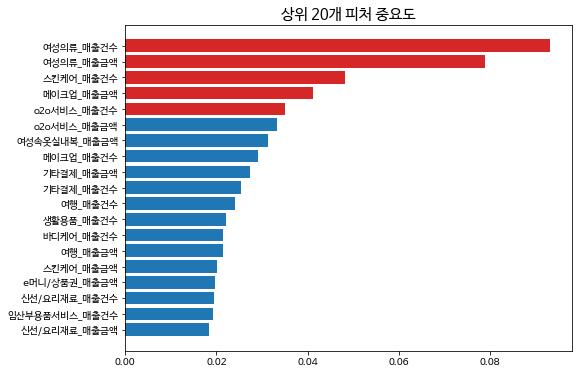

In [ ]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='tab:red')
plt.show()

### 3.1.2 연령예측하기

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:103]
y = df.iloc[:,[2]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier(n_estimators= 100, criterion='gini', min_samples_split=2, n_jobs=-1)
baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test_s)

In [ ]:
##scaled 하고 정확도가 더 높아짐!
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          20       0.89      0.92      0.90       382
          30       0.85      0.76      0.81       365
          40       0.77      0.79      0.78       357
          50       0.75      0.79      0.77       363
          60       0.83      0.84      0.83       337

    accuracy                           0.82      1804
   macro avg       0.82      0.82      0.82      1804
weighted avg       0.82      0.82      0.82      1804



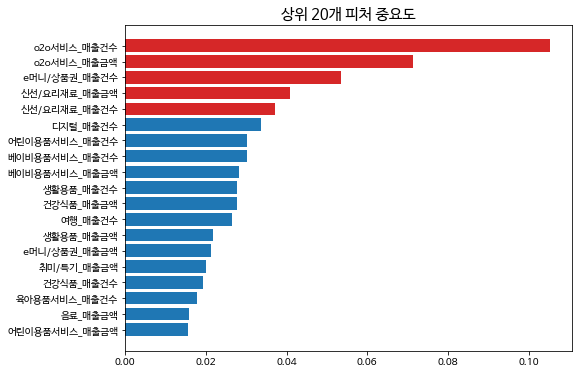

In [ ]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='tab:red')
plt.show()

## **3.2 XGBoost 방법**

### 3.2.1 성별 예측하기

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:103]
y = df.iloc[:,[1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

RandomsearchCV를 통해 hyperparameter 추출

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [ ]:
clf = xgb.XGBClassifier()

param_grid = {
        'max_depth': [6, 9, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 1.5, 3.0, 7.0, 10.0],
        'n_estimators': [100]}

fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 5,
              'eval_set': [(X_test_s, y_test)]}

hr_grid = RandomizedSearchCV(clf, param_grid, n_iter=100,
                            n_jobs=1, verbose=2, cv=5,
                            scoring='neg_log_loss', refit=False, random_state=42)

In [ ]:
hr_grid.fit(X_train_s, y_train,**fit_params)
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:09] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEv

[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:10] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estim

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:11] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8 
[CV]  s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:12] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:13] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:14] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subs

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:15] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:16] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:17] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=1.0, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:18] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:19] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:20] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_esti

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:21] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:22] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:23] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:24] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:25] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:26] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.8,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:27] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.2, colsample_bytree=1.0, total=   0.2s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:28] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5 
[CV]  s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:29] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:30] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.8

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:31] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8 
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:32] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subs

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:33] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:34] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:35] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estim

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:36] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsampl

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:37] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.9,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:38] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_esti

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:39] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.7, n_es

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:40] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:41] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:42] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:43] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:44] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:45] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:46] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:47] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:48] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:49] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:50] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:51] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.4 
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:52] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:53] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:54] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subs

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:55] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsa

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:56] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.7, n_es

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:57] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_es

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:58] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:59] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.2s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:00] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:01] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9 
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:02] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsamp

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:03] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample=0.5, n_es

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:04] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:05] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:06] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:07] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:08] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.8, n_est

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:09] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9 
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:10] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsamp

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:11] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsam

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.0min finished


,mean_test_score,params
0,NaN,"{'subsample': 0.5, 'n_estimators': 100, 'min_c..."
1,NaN,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."
2,NaN,"{'subsample': 0.7, 'n_estimators': 100, 'min_c..."
3,NaN,"{'subsample': 0.7, 'n_estimators': 100, 'min_c..."
4,NaN,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."
...,...,...
95,NaN,"{'subsample': 0.8, 'n_estimators': 100, 'min_c..."
96,NaN,"{'subsample': 0.6, 'n_estimators': 100, 'min_c..."
97,NaN,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."
98,NaN,"{'subsample': 0.6, 'n_estimators': 100, 'min_c..."


In [ ]:
hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120188,0.001075,0.0,0.0,0.5,100,10,6,0.001,1,"{'subsample': 0.5, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.124158,0.004968,0.0,0.0,1,100,7,9,0.1,0.8,"{'subsample': 1.0, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
2,0.136939,0.005185,0.0,0.0,0.7,100,1,15,0.01,0.6,"{'subsample': 0.7, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
3,0.128509,0.007208,0.0,0.0,0.7,100,7,20,0.001,0.8,"{'subsample': 0.7, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
4,0.123552,0.008402,0.0,0.0,1,100,10,9,0.1,0.8,"{'subsample': 1.0, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,69


GridsearchCV를 통해 hyperparameter 추출

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [6, 9],
              'learning_rate': [0.001, 0.01, 0.1],
              'subsample': [0.5, 0.7, 1],
              'n_estimators': [100],
              'colsample_bytree': [0.6, 0.8, 1],
              'min_child_weight':[0.7, 1, 1.5, 7,10]}
              
fit_params={"early_stopping_rounds":5,'eval_set': [(X_test_s, y_test)] }
# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

In [ ]:
hr_grid.fit(X_train_s, y_train,**fit_params)
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

[0]	validation_0-error:0.146341
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.138027


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.12694
[3]	validation_0-error:0.124169
[4]	validation_0-error:0.12306
[5]	validation_0-error:0.12306
[6]	validation_0-error:0.12306
[7]	validation_0-error:0.124723
[8]	validation_0-error:0.121397
[9]	validation_0-error:0.118071
[10]	validation_0-error:0.117517
[11]	validation_0-error:0.118071
[12]	validation_0-error:0.117517
[13]	validation_0-error:0.114745
[14]	validation_0-error:0.114745
[15]	validation_0-error:0.111419
[16]	validation_0-error:0.111419
[17]	validation_0-error:0.11031
[18]	validation_0-error:0.108647
[19]	validation_0-error:0.106984
[20]	validation_0-error:0.107539
[21]	validation_0-error:0.109756
[22]	validation_0-error:0.108647
[23]	validation_0-error:0.108093
[24]	validation_0-error:0.105876
[25]	validation_0-error:0.104213
[26]	validation_0-error:0.105876
[27]	validation_0-error:0.105322
[28]	validation_0-error:0.105876
[29]	validation_0-error:0.10643
[30]	validation_0-error:0.104767
Stopping. Best iteration:
[25]	validation_0-error:0.10421

,mean_test_score,params
0,0.961452,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
1,0.962900,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
2,0.963004,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
3,0.963144,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
4,0.962487,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
...,...,...
265,0.964563,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
266,0.963204,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
267,0.962312,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
268,0.966884,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."


In [ ]:
hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
163,2.302542,0.460647,0.010021,0.001319,0.8,0.1,6,10,100,0.7,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.965343,0.976934,0.973685,0.972331,0.969028,0.971464,0.003975,1,0.980649,0.983450,0.980023,0.977572,0.980634,0.980466,0.001873
61,1.903027,0.510326,0.009459,0.001165,0.6,0.1,6,0.7,100,0.7,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.965016,0.976407,0.973947,0.972690,0.967646,0.971141,0.004189,2,0.983557,0.987425,0.984781,0.983114,0.982941,0.984364,0.001660
68,1.890068,0.540954,0.010098,0.002711,0.6,0.1,6,1.5,100,1,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.966850,0.974424,0.971447,0.970439,0.970873,0.970807,0.002420,3,0.984990,0.986648,0.981992,0.982113,0.987598,0.984668,0.002293
269,3.292736,0.539149,0.009065,0.001007,1,0.1,9,10,100,1,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.962628,0.973695,0.974609,0.972228,0.969472,0.970526,0.004315,4,0.982080,0.986668,0.985778,0.984953,0.987120,0.985320,0.001783
251,2.709195,0.392985,0.009119,0.000938,1,0.1,6,7,100,1,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.967407,0.972308,0.973837,0.970971,0.967062,0.970317,0.002678,5,0.984969,0.982968,0.981934,0.980008,0.981767,0.982329,0.001627


In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(max_depth=6, n_estimators=100, colsample_bytree=0.8, learning_rate=0.1,subsample=0.7,min_child_weight=10) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       928
           1       0.88      0.92      0.90       876

    accuracy                           0.90      1804
   macro avg       0.90      0.90      0.90      1804
weighted avg       0.90      0.90      0.90      1804



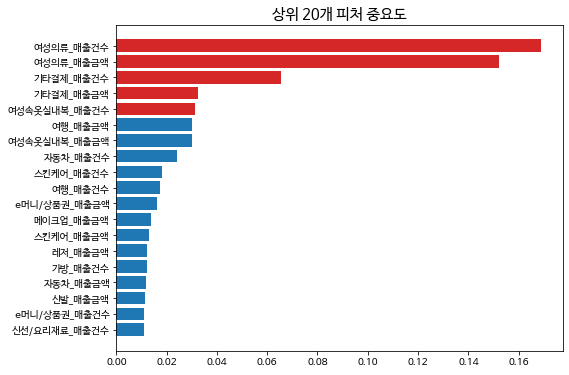

In [ ]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='tab:red')
plt.show()

트리구조를 파악해서 각 노드들의 경계값을 파악해서 분석하고자 하는 대상의 피처를 구분짓는 임계점을 알아 낼 수 있다.

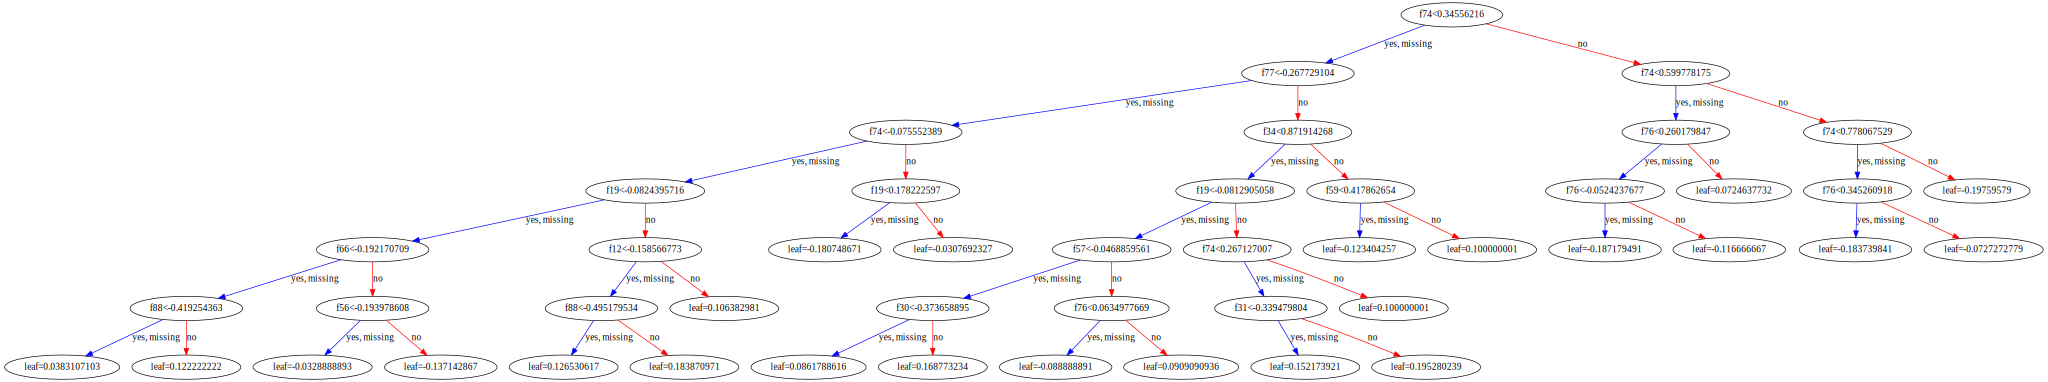

In [ ]:
##첫번째 트리구조
import graphviz
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

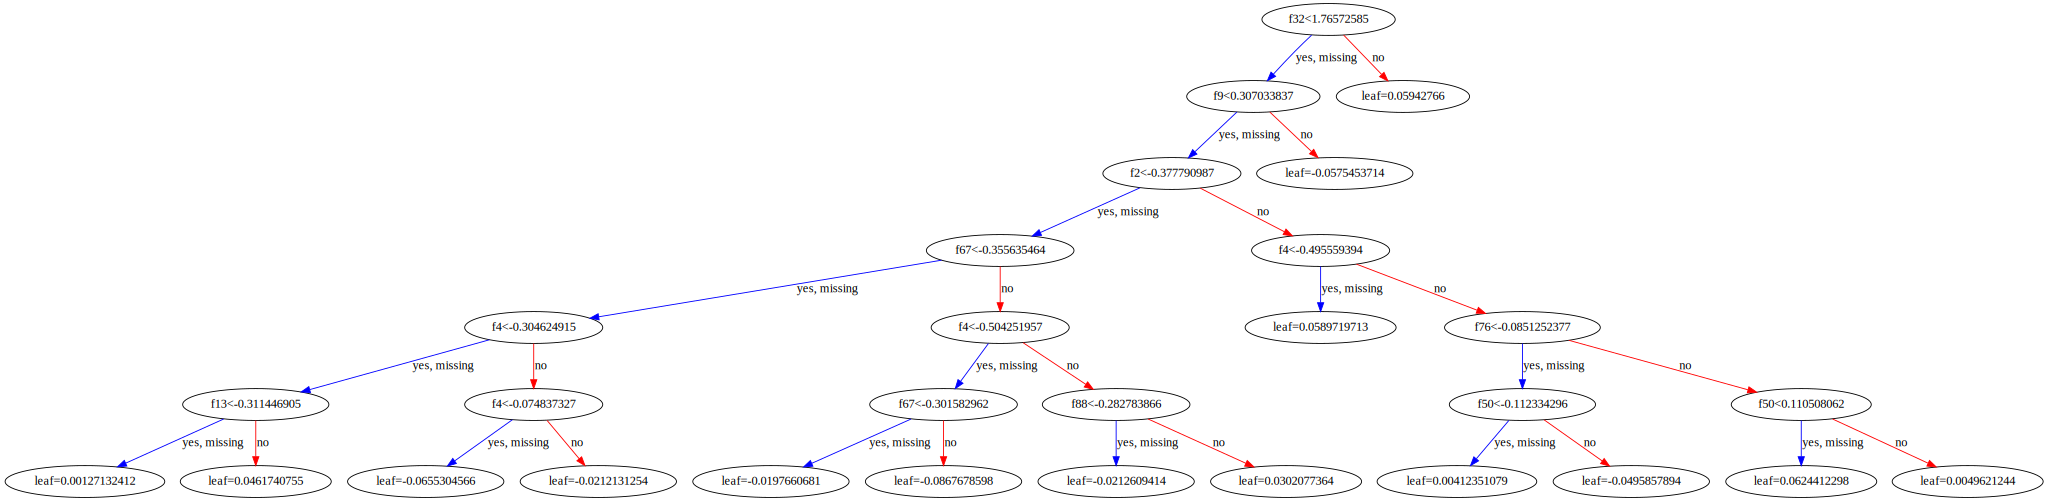

In [ ]:
##마지막 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=99)
graph = graphviz.Source(dot_data)
graph

상위 5개만 추출하여 진행

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df[['여성의류_매출건수', '기타결제_매출건수','여성속옷실내복_매출건수','자동차_매출건수','여행_매출건수']]
y = df.iloc[:,[1]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier(max_depth=6, n_estimators=100, colsample_bytree=0.8, learning_rate=0.1,subsample=0.7,min_child_weight=10) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
##주요 피처들만 추출한 성능이 더 높음
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       928
           1       0.88      0.92      0.90       876

    accuracy                           0.90      1804
   macro avg       0.90      0.90      0.90      1804
weighted avg       0.90      0.90      0.90      1804



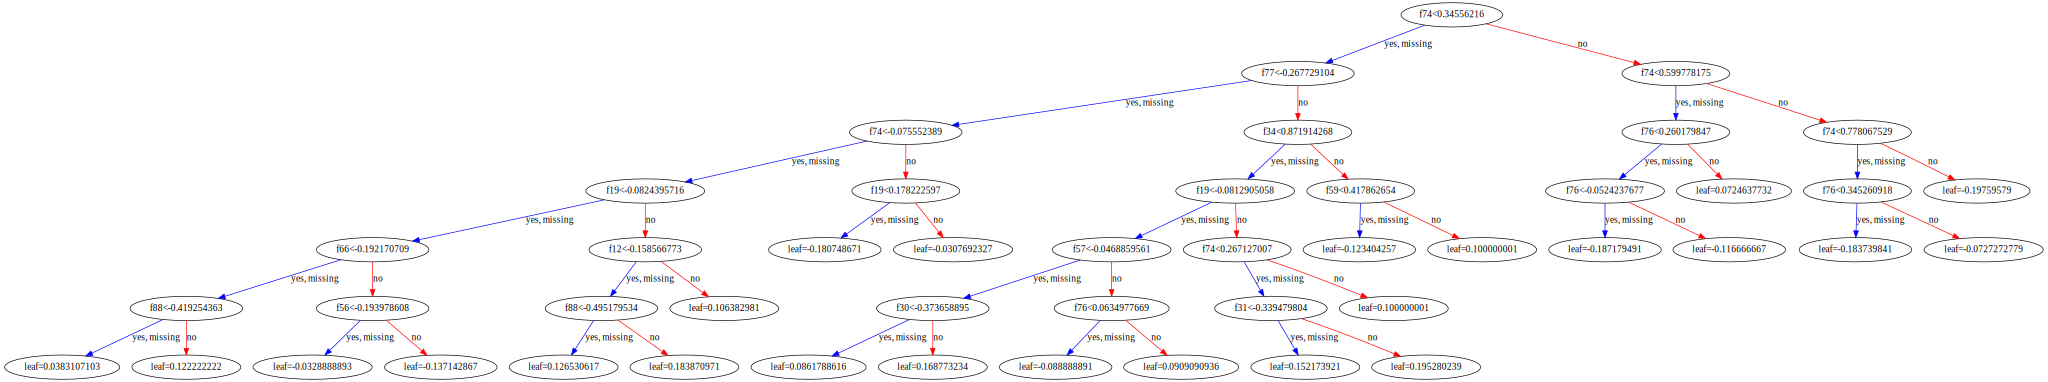

In [ ]:
import graphviz
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

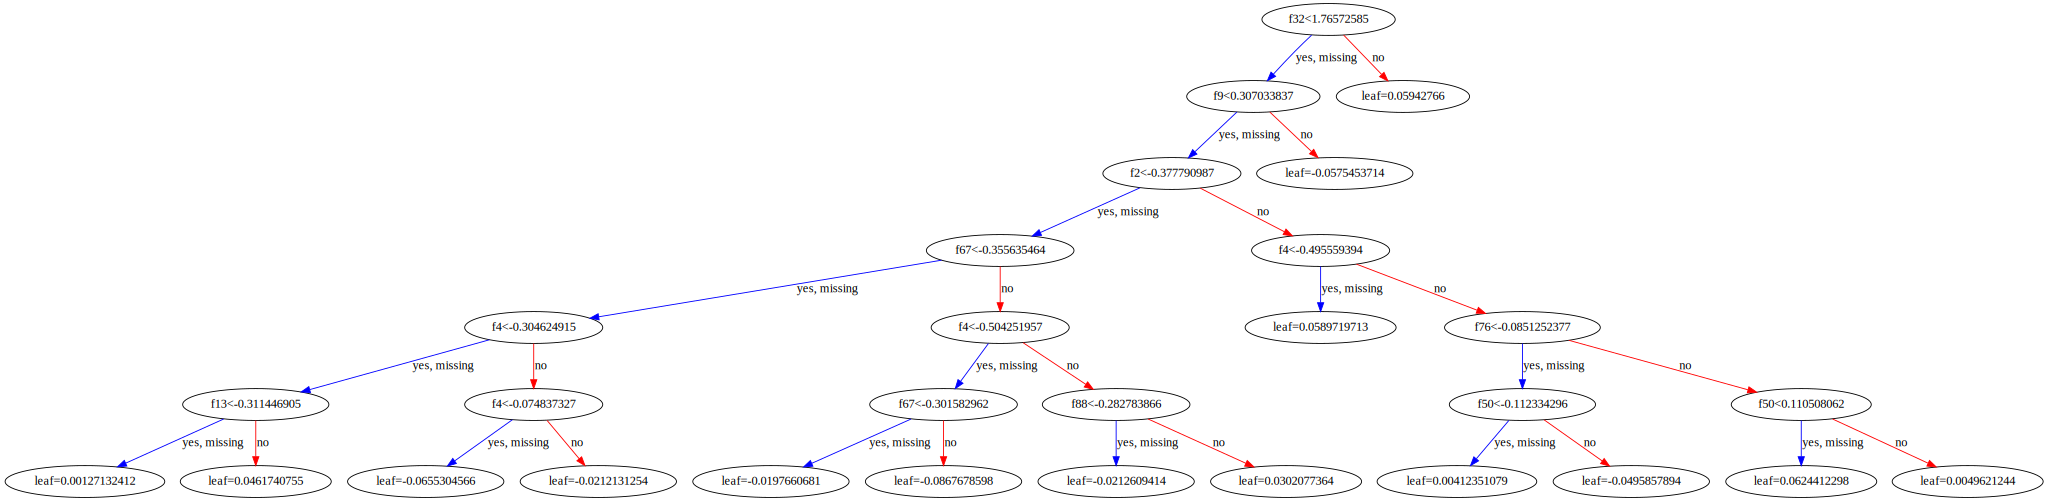

In [ ]:
##마지막 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=99)
graph = graphviz.Source(dot_data)
graph

### 3.2.2 연령 예측하기

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:103]
y = df.iloc[:,[2]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

분류진행

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=6, n_estimators=100, colsample_bytree=0.8, learning_rate=0.1,subsample=0.7,min_child_weight=10) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

          20       0.91      0.94      0.93       382
          30       0.88      0.81      0.84       365
          40       0.80      0.82      0.81       357
          50       0.80      0.82      0.81       363
          60       0.86      0.87      0.86       337

    accuracy                           0.85      1804
   macro avg       0.85      0.85      0.85      1804
weighted avg       0.85      0.85      0.85      1804



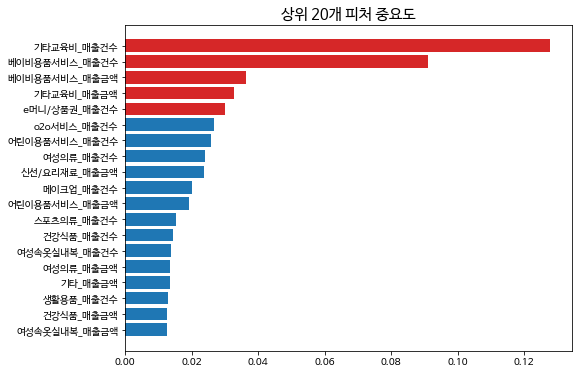

In [ ]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='tab:red')
plt.show()

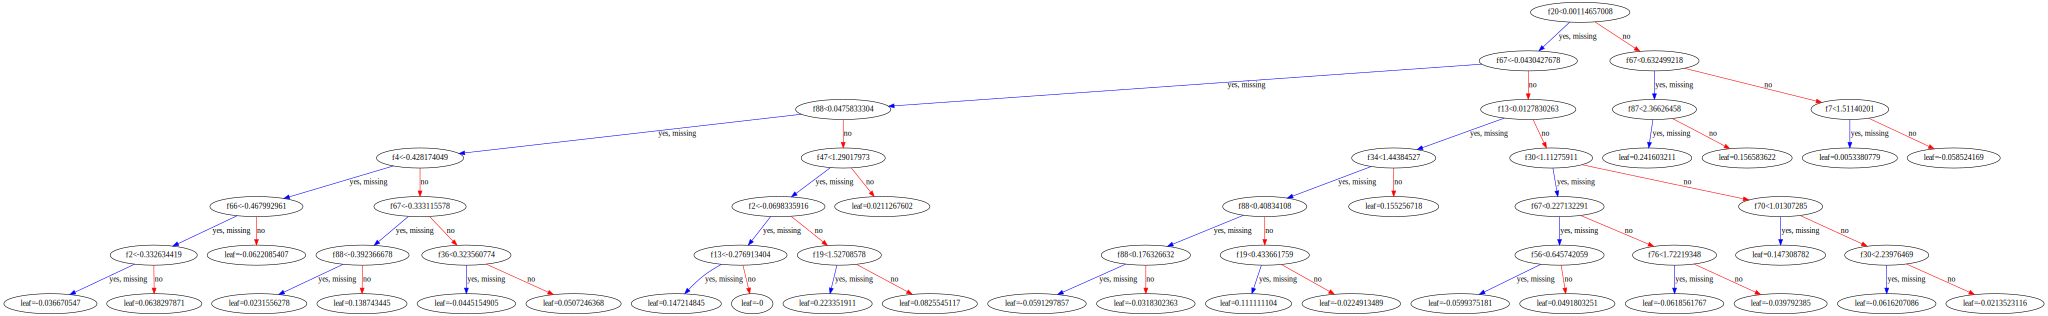

In [ ]:
##첫번째 트리구조
import graphviz
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

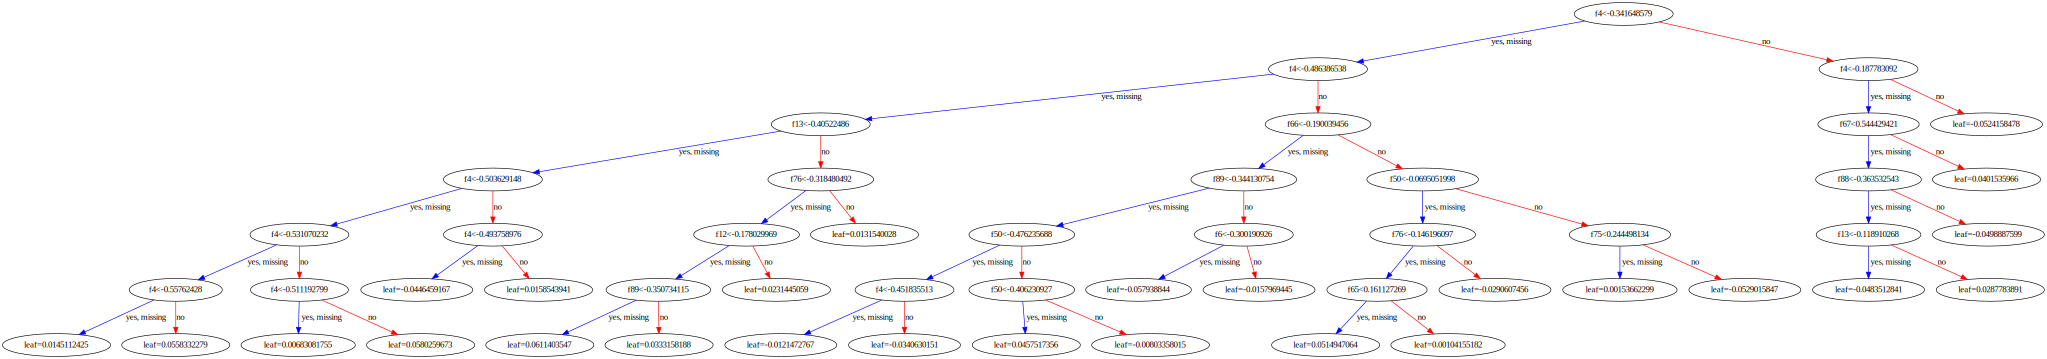

In [ ]:
##마지막 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=99)
graph = graphviz.Source(dot_data)
graph

상위 5개만 추출하여 진행

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df[['기타교육비_매출건수', '베이비용품서비스_매출건수',' e머니/상품권_매출건수','o2o서비스_매출건수','어린이용품서비스_매출건수']]
y = df.iloc[:,[2]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier(max_depth=6, n_estimators=100, colsample_bytree=0.8, learning_rate=0.1,subsample=0.7,min_child_weight=10) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

          20       0.91      0.94      0.93       382
          30       0.88      0.81      0.84       365
          40       0.80      0.82      0.81       357
          50       0.80      0.82      0.81       363
          60       0.86      0.87      0.86       337

    accuracy                           0.85      1804
   macro avg       0.85      0.85      0.85      1804
weighted avg       0.85      0.85      0.85      1804



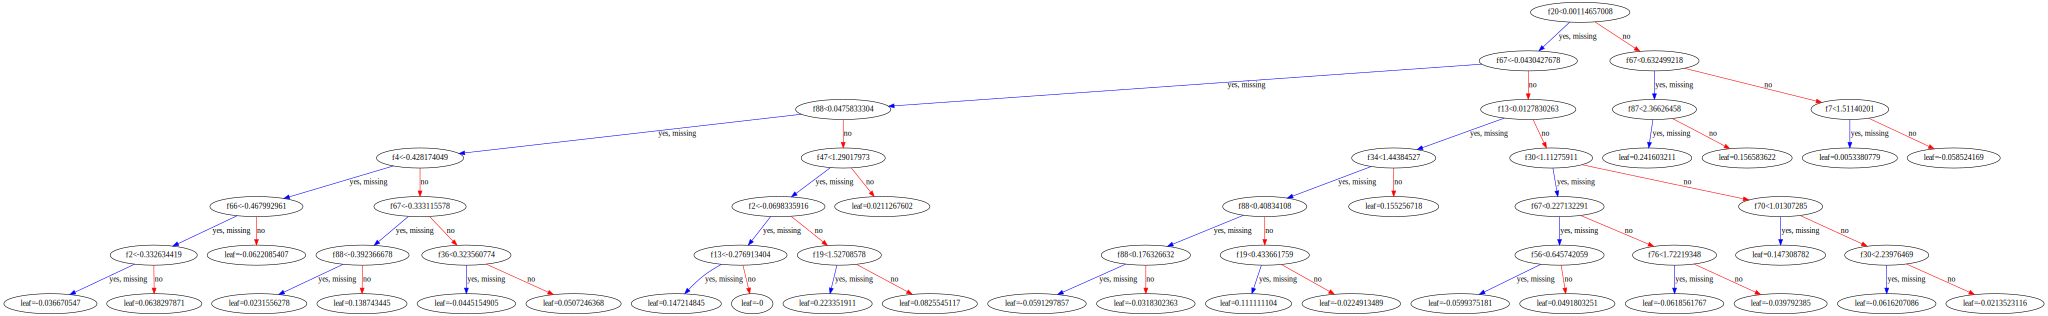

In [ ]:
import graphviz
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

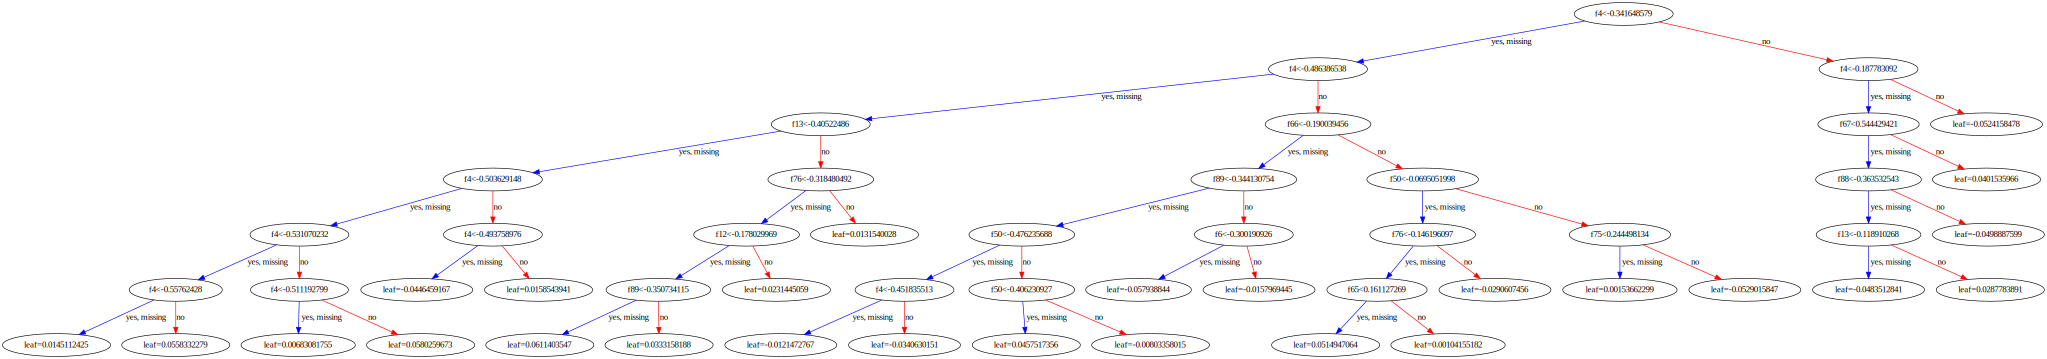

In [ ]:
##마지막 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=99)
graph = graphviz.Source(dot_data)
graph

### 3.3.3. o2o서비스 성별 차이 시각화

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])
p = df.groupby('성별').sum()['o2o서비스_매출건수']
count = df.groupby('성별').count().iloc[:,1]
indecies = ['여성','남성']
colors = ['tab:red','tab:blue']
plt.bar(indecies, p, color=colors)
plt.title("성별 o2o서비스 1인당 매출건수 합계")
plt.savefig('saved_figure/성별 o2o서비스 1인당 매출건수 합계.png')

### 3.3.4. e머니/상품권 연령별 차이 시각화

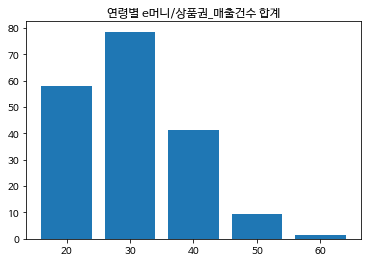

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])
p = df.groupby('연령').sum()[' e머니/상품권_매출건수']
count = df.groupby('연령').count().iloc[:,1]
indecies = ['20','30','40','50','60']
colors = ['tab:blue']
plt.bar(indecies, p, color=colors)
plt.title("연령별 e머니/상품권_매출건수 합계")
plt.savefig('saved_figure/연령별 e머니상품권_매출건수 합계.png')

### 3.3.5. 기타교육비 연령별 차이 시각화

Text(0.5, 1.0, '연령별 기타교육비 1인당 매출건수 합계')

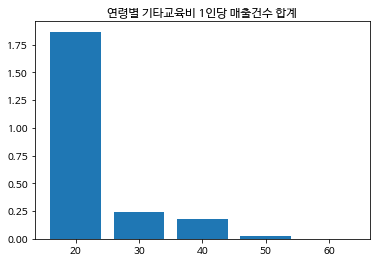

In [ ]:
df= pd.read_csv("data/refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])
p = df.groupby('연령').sum()['기타교육비_매출건수']
count = df.groupby('연령').count().iloc[:,1]
indecies = ['20','30','40','50','60']
colors = ['tab:blue']
plt.bar(indecies, p, color=colors)
plt.title("연령별 기타교육비 1인당 매출건수 합계")


#4. 소비자 구매 패턴 분석


In [ ]:
%cd /content/drive/MyDrive/공모전 코드제출/data

/content/drive/.shortcut-targets-by-id/16cVPJBZGAUPZD2JDsPnQwa5cDruC_7Z_/공모전 코드제출/data


In [ ]:
df = pd.read_csv("refined_Join_per person.csv")

분석과 관계 없는 열 제거

In [ ]:
for colnames in ['Unnamed: 0', '법정동','법정동코드', 'n']:
  try:
    df = df.drop(columns=colnames)
  except:
    print(f'{colnames}는 이미 삭제되었습니다')

In [ ]:
import pickle
with open('pum_list.pickle', 'rb') as f: #미리 저장해놓은 품목명 리스트를 불러오기 
  pum_list = pickle.load(f) 

In [ ]:
import re

new_index_pum = []
new_index_item = []
for idx, item in enumerate(pum_list): ##데이터 문제때문에 /를 &로 바꿔서 다시 저장
  item_m = re.sub('\/','&', item)     ##품목 리스트와 칼럼 이름의 /를 각각 &로 바꾸는 과정
  new_index_pum.append(item_m)
pum_list = new_index_pum
for idx, item in enumerate(df.columns):
  item_m = re.sub('\/','&', item)
  item_m = item_m.strip()
  new_index_item.append(item_m)
df.columns = new_index_item
df.head()

,성별,연령,DIY자재&용품_매출건수,DIY자재&용품_매출금액,e머니&상품권_매출건수,e머니&상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부&후원_매출건수,기부&후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,모바일상품_매출금액,...,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미&특기_매출건수,취미&특기_매출금액,침구&수예_매출건수,침구&수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,기준년월,인구수
0,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,44.049231,...,0.000000,0.000000,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.0,800819.426087,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,1,6114
1,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,13.273307,...,0.001636,107.793261,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.0,850187.500000,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,2,6114
2,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,55.230618,...,0.001472,82.424763,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.0,689392.190083,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,3,6114
3,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.001636,69.506542,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.0,859755.704000,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,4,6114
4,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,427.436539,...,0.000818,36.832188,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.0,840075.455285,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,5,6114


### 4.1. 성별, 연령에 따른 구매 선호도 분석

####4.1.1. 성별에 따른 구매 선호도 분석

In [ ]:
g_df = df.groupby(['성별']).sum()
tmp_f = g_df.iloc[:,1:101]
selected_idx = []
target='매출건수'
if target == "매출건수":
  for lst in pum_list:
    lst_price = lst+'_매출금액'
    selected_idx.append(lst_price)
else:
  for lst in pum_list:
    lst_price = lst+'_매출건수'
    selected_idx.append(lst_price)
tmp_f = tmp_f.drop(columns=selected_idx)
sort_female = tmp_f.iloc[0,:].T.sort_values(ascending=False)
sort_male = tmp_f.iloc[1,:].T.sort_values(ascending=False)

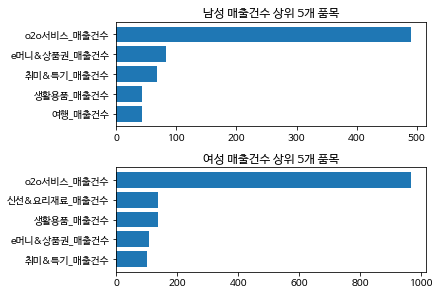

In [ ]:
f, ax = plt.subplots(2,1, constrained_layout=True)

asc_male = sort_male[0:5].sort_values(ascending=True)
ax[0].barh(asc_male.index, asc_male)
ax[0].set_title('남성 매출건수 상위 5개 품목')
asc_female = sort_female[0:5].sort_values(ascending=True)
ax[1].barh(asc_female.index, asc_female)
ax[1].set_title('여성 매출건수 상위 5개 품목')
f.show()

#### 4.1.2. 연령에 따른 구매 선호도 분석

In [ ]:
g_df = df.groupby(['연령']).sum()
tmp_f = g_df.iloc[:,1:101]
selected_idx = []
target='매출건수'
if target == "매출건수":
  for lst in pum_list:
    lst_price = lst+'_매출금액'
    selected_idx.append(lst_price)
else:
  for lst in pum_list:
    lst_price = lst+'_매출건수'
    selected_idx.append(lst_price)
tmp_f = tmp_f.drop(columns=selected_idx)

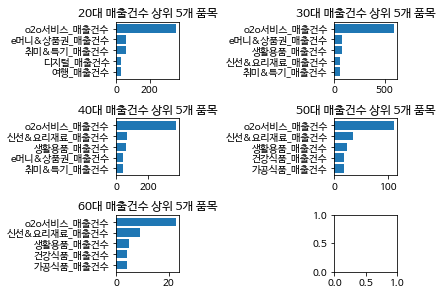

In [ ]:
f, ax = plt.subplots(3,2, constrained_layout=True)
ages = [20, 30, 40, 50, 60]
for i, age in enumerate(ages):
  sort_age = tmp_f.iloc[i,:].T.sort_values(ascending=False)[0:5].sort_values(ascending=True)
  ax[i//2, i%2].barh(sort_age.index, sort_age)
  ax[i//2, i%2].set_title(f'{age}대 매출건수 상위 5개 품목')

f.show()

### 4.2. 특정 품목과 관련있는 구매패턴 분석

####4.2.1. 각 품목별 변수 중요도 topk를 뽑아 데이터프레임으로 저장

* 중요도를 뽑는 방법은 연령 및 성별예측에서 우수한 성능을 보였던 XGBoost를 사용
* 각 품목마다 성향이 매우 다르고 중요도가 높은 피쳐를 뽑을 뿐 예측력이 높은 것을 목적으로 하지 않기 때문에 따로 검증과정을 진행하지 않음
* 금융자산과 소비의 연관성을 알아보기 위해 only_finance라는 매개변수를 설정. 0이 아니라면 타겟 품목과 금융데이터만으로 피쳐 중요도 추출

In [ ]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import RobustScaler #sparse한 데이터에 맞는 RobustScaler사용

df = df #처음 불러운 데이터프레임 이름
topk = 5 #feature importance 상위 k개
only_finance = 1 #금융데이터만 포함할 경우 0이아닌 수

scaler = RobustScaler()
imp_dict = {}
'''
각 품목의 매출건수 혹은 매출금액을 목표값으로 하는 xgboost 모형으로 피쳐 중요도 산출함.
각 품목마다 10개 이하의 피쳐를 선택해 다음 분석에 활용함.
모형의 설명력을 뜻하는 R-squared값 또한 산출해 분석에 활용함.
산출된 데이터는 딕셔너리 형태로, 각 품목에 따른 10개의 중요한 피쳐와 피쳐 중요도, R-squared값이 포함되어 있음.
'''
for pum_name in pum_list:
    pum_gun =  pum_name + '_매출건수' 
    pum_price = pum_name + '_매출금액'
    try:
        if only_finance == 0: 
          y = df[pum_gun]
          X = df.drop(columns = [pum_gun, pum_price])
        else:
          y = df[pum_gun]
          df_temp1 = df.iloc[:,0:2]
          df_temp2 = df.iloc[:,102:114] #금융데이터만 포함
          new_df = pd.concat([df_temp1, df_temp2], axis=1)
          X = new_df
        '''
        데이터셋 훈련 및 검증
        '''
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #train_test split
        X_train_s = scaler.fit_transform(X_train)
        X_test_s = scaler.transform(X_test)
        xgb_model = XGBRegressor(objective='reg:squarederror')
        xgb_model.fit(X_train_s, y_train.to_numpy().ravel())
        y_pred = xgb_model.predict(X_test_s)
        importances_values = xgb_model.feature_importances_
        importances = pd.Series(importances_values, index=X_train.columns)
        topk_list = importances.sort_values(ascending=False)[:topk]
        r2 = r2_score(y_test, y_pred)
        concat = topk_list
        concat['R2 score'] = r2
        imp_dict[pum_name] = concat
    except:
      print(pum_name,'변환되지 않음')


imp_dict

{'DIY자재&용품': 예적금금액       0.134730
 담보대출금액      0.123287
 총소비금액       0.105587
 R2 score    0.143698
 dtype: float64, 'e머니&상품권': 연금입금        0.332686
 예적금금액       0.112363
 급여입금        0.099498
 R2 score    0.310656
 dtype: float64, 'o2o서비스': 연금입금        0.237374
 급여입금        0.182601
 주택대출금액      0.114459
 R2 score    0.435744
 dtype: float64, '가공식품': 연금입금        0.249009
 예적금금액       0.123933
 급여입금        0.113206
 R2 score    0.347008
 dtype: float64, '가방': 연금입금        0.125238
 전세자금대출금액    0.118663
 급여입금        0.103248
 R2 score    0.184957
 dtype: float64, '가전': 연금입금        0.190474
 예적금금액       0.135607
 담보대출금액      0.096905
 R2 score    0.344518
 dtype: float64, '건강식품': 연금입금        0.165369
 급여입금        0.141471
 예적금금액       0.122087
 R2 score    0.386140
 dtype: float64, '기부&후원': 신용대출금액      0.383008
 전세자금대출금액    0.329237
 담보대출금액      0.088715
 R2 score    0.001953
 dtype: float64, '기타': 연금입금        0.152208
 예적금금액       0.119552
 급여입금        0.101901
 R2 score    0.201231
 dty

In [ ]:
import pickle
ending_ment = ''
if only_finance !=0:
  ending_ment = 'finance'
else:
  ending_ment = ''
with open(f'feature_importance{topk}_{ending_ment}.pickle', 'wb') as f: #훈련시간이 3분정도 소요. 저장한 파일을 불러오는 것을 추천
  pickle.dump(imp_dict, f)

#### 4.2.2. 추출된 변수로 상관관계 분석(Shapley value 이용)

In [ ]:
import pickle
with open('feature_importance10_finance.pickle', 'rb') as f: #어떤 feature importance를 불러올 것인지 결정
  xgb_imp = pickle.load(f)

In [ ]:
xgb_imp['여행'][10]

0.32838019536933705

R-squared가 0.5 이상일 때만 포함시켜 설명력이 높은 분석결과만 포함하도록 하였음.

In [ ]:
name_dict = {} #dictionary 형태
keys = xgb_imp.keys()
for key in keys:
  if xgb_imp[key][10] >= 0.5:
    target = key
    names = list(xgb_imp[key].index)[0:10]
    name_dict[target] = names

In [ ]:
%cd /content/drive/MyDrive/공모전 코드제출/saved_figure/only_finance

/content/drive/.shortcut-targets-by-id/16cVPJBZGAUPZD2JDsPnQwa5cDruC_7Z_/공모전 코드제출/saved_figure/only_finance


In [ ]:
from sklearn.preprocessing import RobustScaler
import shap

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 m

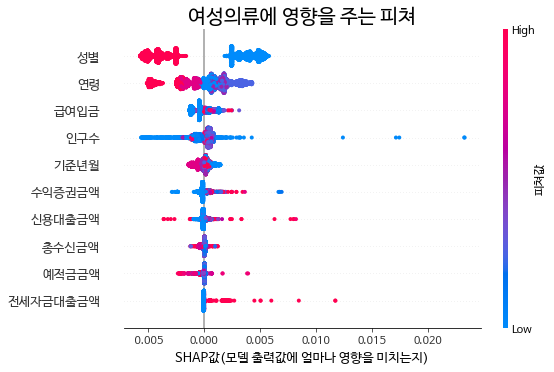

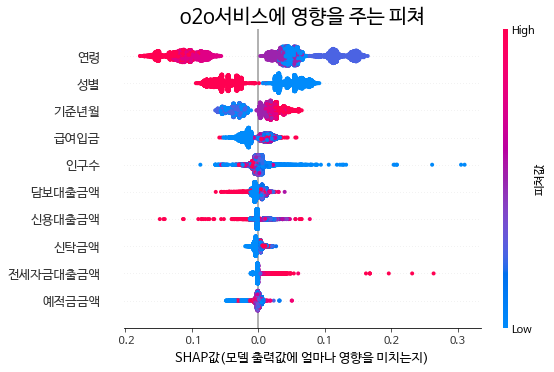

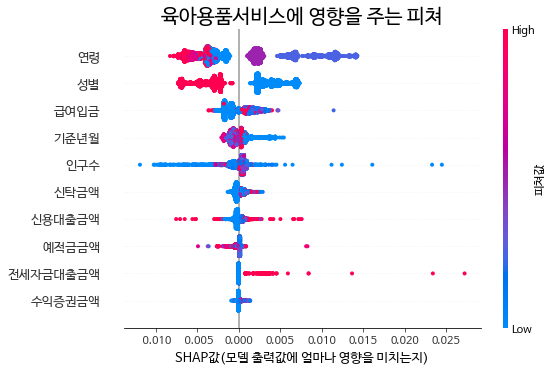

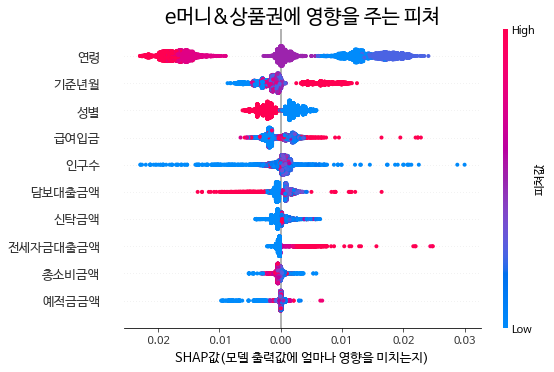

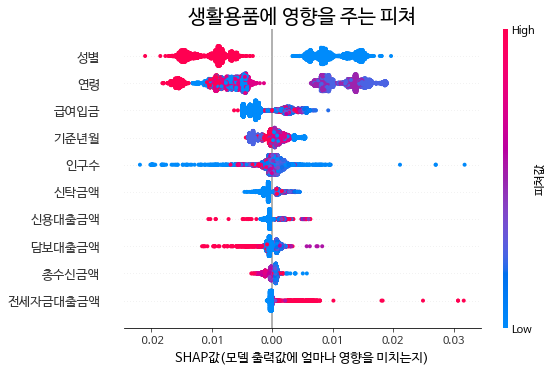

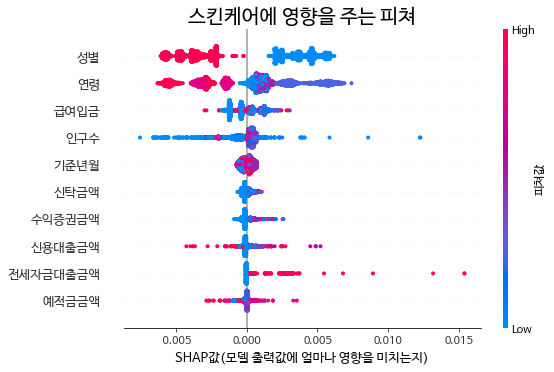

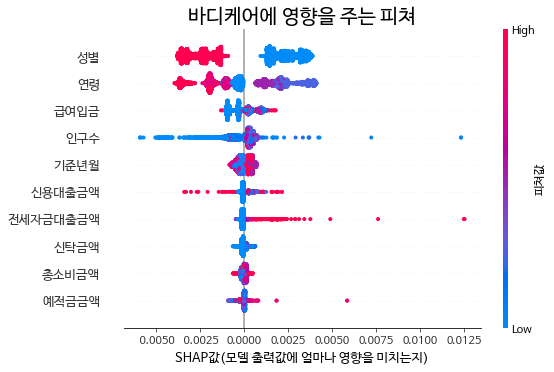

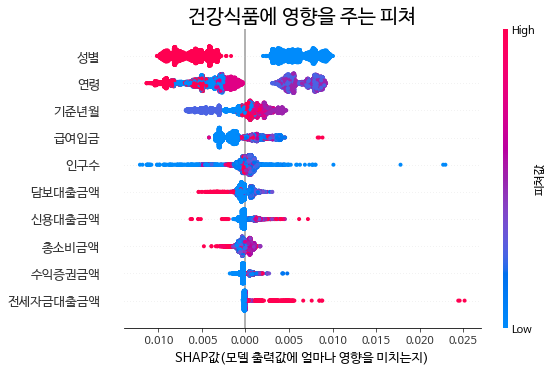

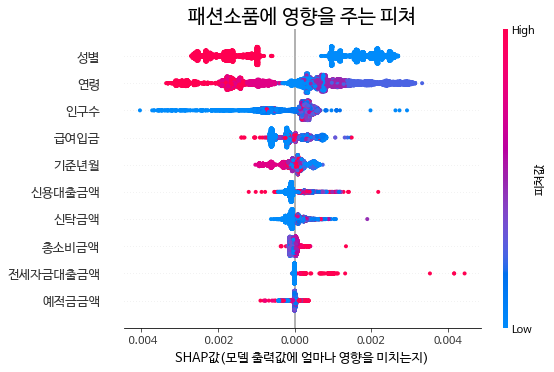

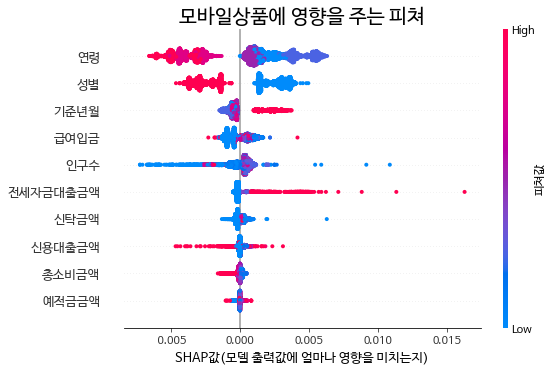

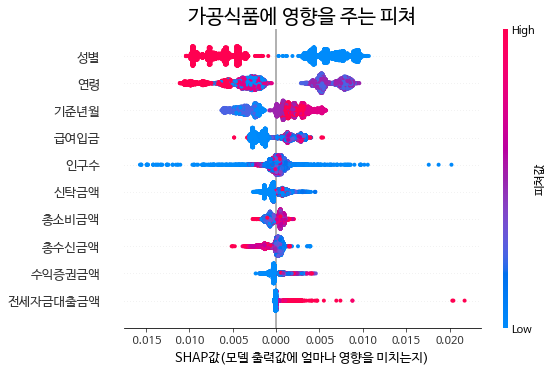

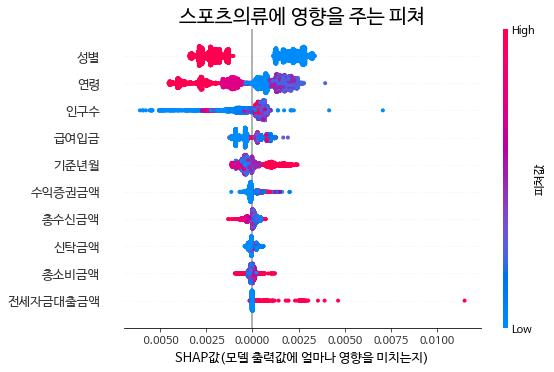

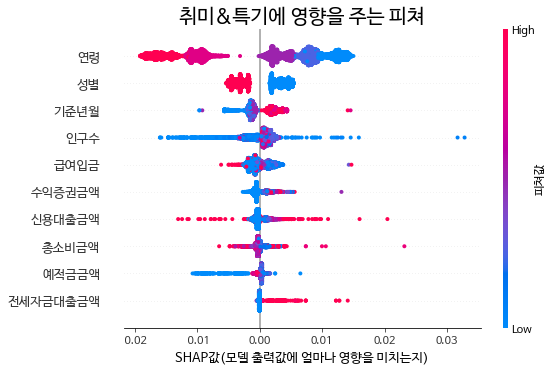

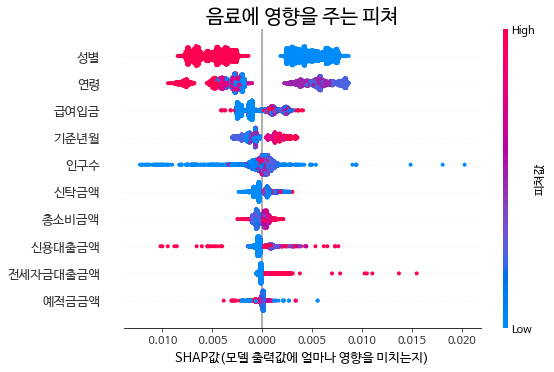

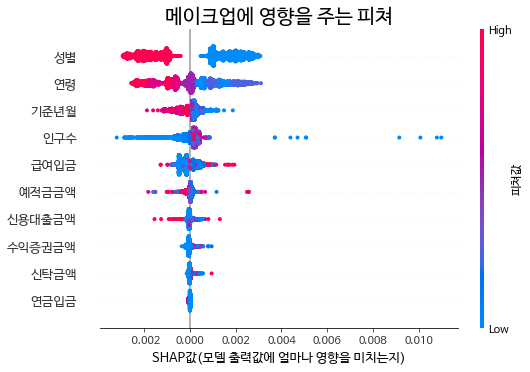

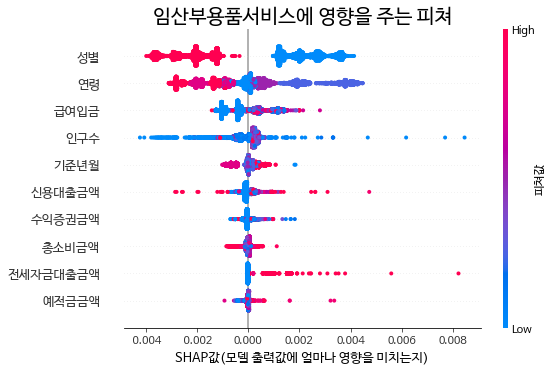

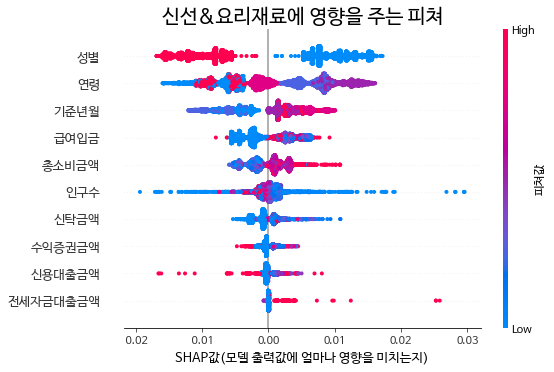

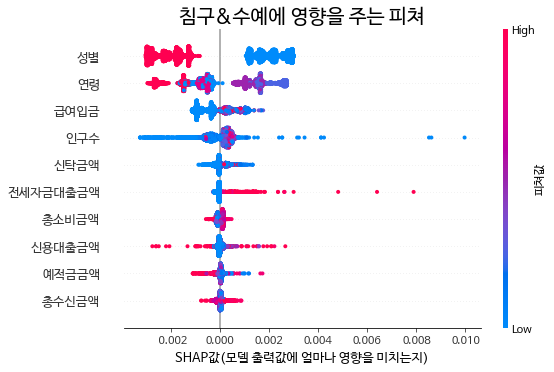

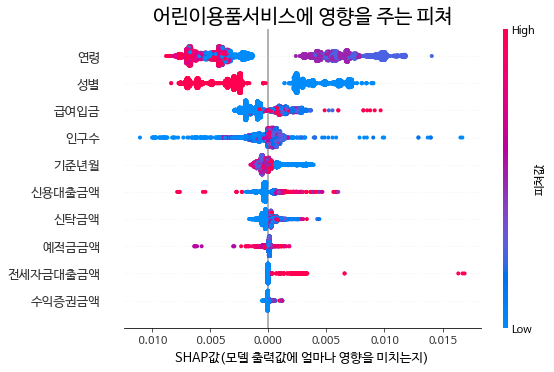

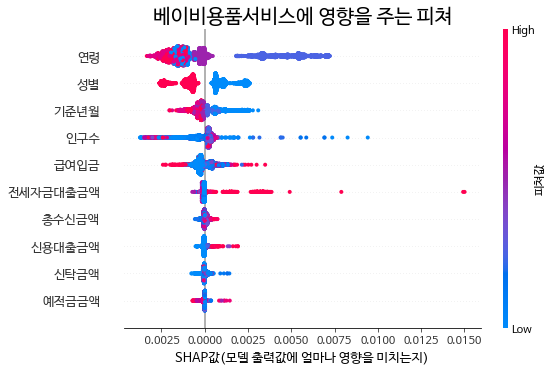

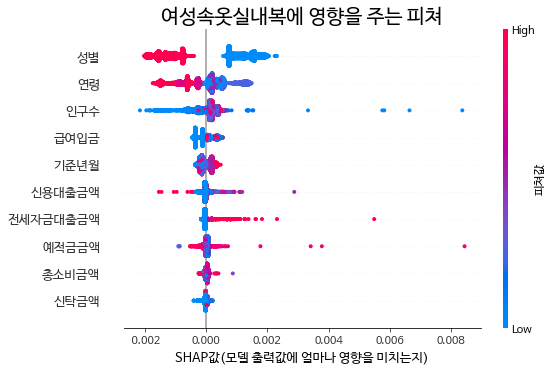

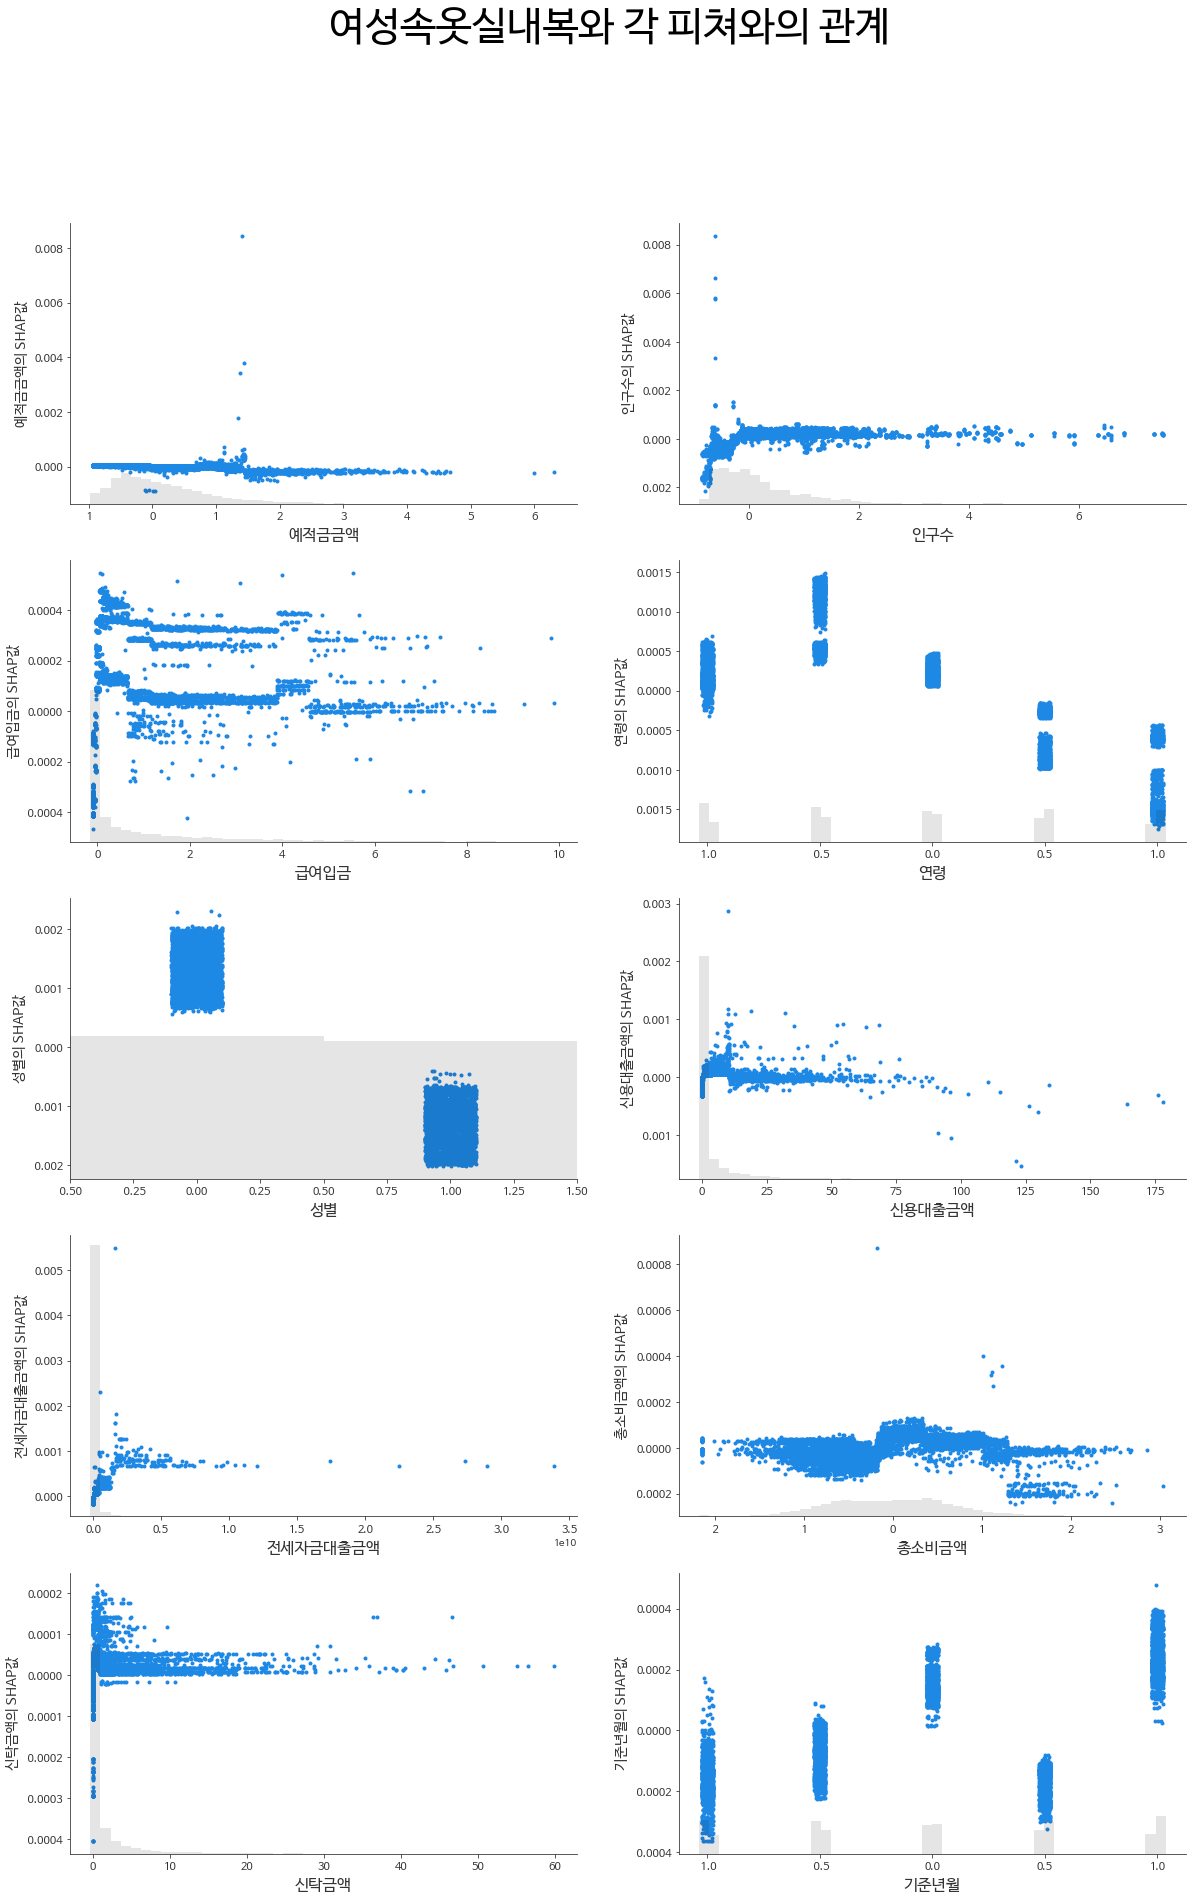

In [ ]:
scaler = RobustScaler()
xgb_r = xgb.XGBRegressor(objective='reg:squarederror')

for key in name_dict.keys():
  plt.cla() #좌표축 초기화
  plt.clf() #figure창 초기화
  '''
  (1) 타겟 품목을 기준으로 훈련
  '''
  X = df.loc[:,name_dict[key]] #선택된 feature만 훈련 대상으로 포함
  target = key + '_매출건수' #매출건수를 예측하는 방식으로 다중회귀분석
  y = df.loc[:,target]
  X_s = scaler.fit_transform(X)#Robust Scaler를 훈련 데이터셋에 적용
  X_sp = pd.DataFrame(X_s, columns=X.columns) #차트 레이블링을 위한 데이터프레임 변형
  xgb_r.fit(X_sp, y.to_numpy().ravel()) #xgb regressor에 데이터 삽입
  explainer = shap.Explainer(xgb_r) 
  shap_values = explainer(X_sp)
  '''
  (2) Beeswarm plot
  '''
  shap.plots.beeswarm(shap_values, show = False, color_bar_label = '피쳐값')
  fig = plt.gcf()
  ax = plt.gca()
  ax.set_title(f'{key}에 영향을 주는 피쳐', fontsize=20)
  ax.set_xlabel('SHAP값(모델 출력값에 얼마나 영향을 미치는지)')
  fig.savefig(f'{key}_beeswarm.png', bbox_inches = 'tight')
  '''
  (3) Scatter plot
  '''
  adj_row = len(name_dict[key]) // 2
  row = 0
  f, ax = plt.subplots(adj_row,2, figsize=(20,30))
  for idx, name in enumerate(name_dict[key]):
    shap.plots.scatter(shap_values[:,name], ax=ax[row,idx % 2], show=False)
    ax[row,idx % 2].set_ylabel(f'{name}의 SHAP값', fontsize=14)
    ax[row,idx % 2].set_xlabel(f'{name}', fontsize=16)
    if idx % 2 ==1:
      row+=1
  f.suptitle(f'{key}와 각 피쳐와의 관계', fontsize = 40)
  f.savefig(f'{key}_pdp.png', bbox_inches = 'tight')